<a href="https://colab.research.google.com/github/gnanendri/Stock-market-data-analysis/blob/main/stock_market_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load data
df = pd.read_csv('/content/stocks.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [ ]:
# Pivot to have companies as columns and Adj Close as values
pivot_df = df.pivot(index='Date', columns='Ticker', values='Adj Close').dropna()
pivot_df.columns.name = None
pivot_df = pivot_df.rename(columns={'AAPL': 'Apple', 'MSFT': 'Microsoft', 'NFLX': 'Netflix', 'GOOG': 'Google'})

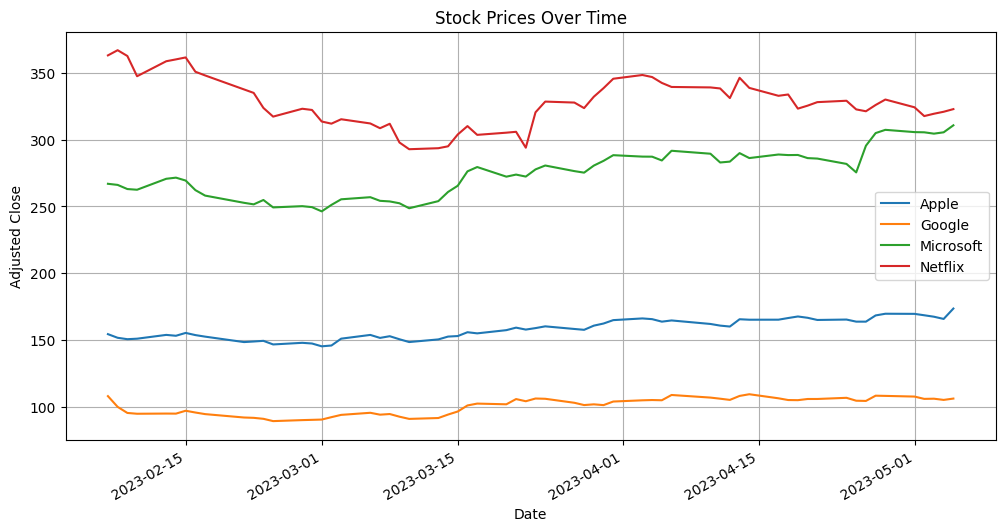

In [ ]:
# Plot time-series
pivot_df.plot(figsize=(12, 6), title='Stock Prices Over Time')
plt.ylabel('Adjusted Close')
plt.grid(True)
plt.show()

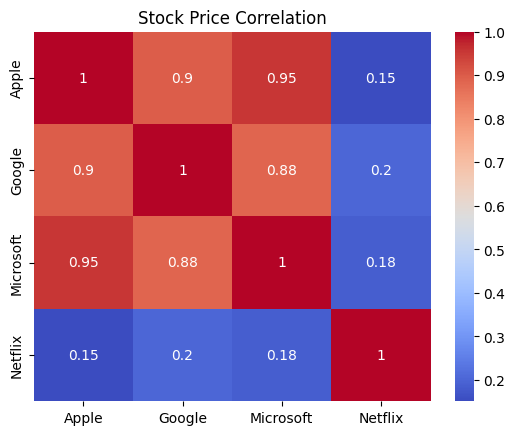

In [ ]:
# Correlation heatmap
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm')
plt.title('Stock Price Correlation')
plt.show()

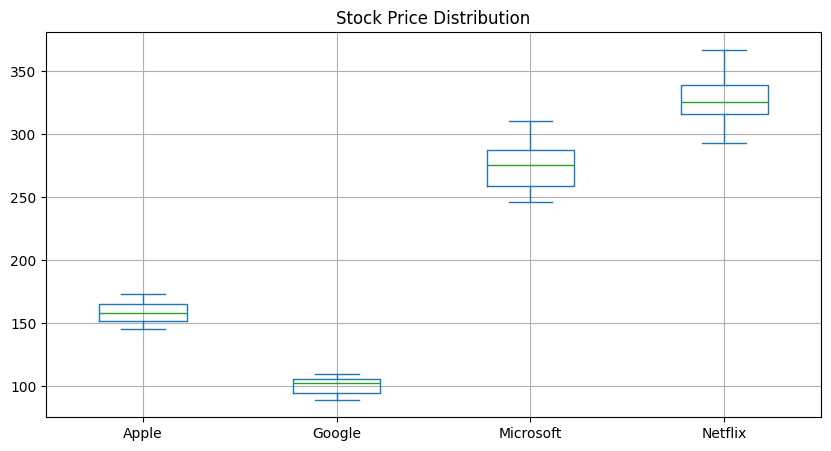

In [ ]:
# Boxplots
pivot_df.plot(kind='box', figsize=(10, 5), title='Stock Price Distribution')
plt.grid(True)
plt.show()

In [ ]:
data = pivot_df.copy()
# Create 1-day lag for each stock
for col in data.columns:
    data[f'{col}_Lag1'] = data[col].shift(1)

In [ ]:
# Drop rows with NaN due to lagging
data = data.dropna()

In [ ]:
# Define features (all lagged columns)
features = [col for col in data.columns if 'Lag1' in col]
target = 'Apple'  # We'll predict Apple's actual price

In [ ]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(data[features])
y = data[target].values

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Choose models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name}")
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}')
    print(f'R² Score: {r2_score(y_true, y_pred):.4f}')

evaluate_model(y_test, lr_pred, 'Linear Regression')
evaluate_model(y_test, rf_pred, 'Random Forest')


📊 Linear Regression
MSE: 7.8553
R² Score: -0.1360

📊 Random Forest
MSE: 29.3717
R² Score: -3.2477


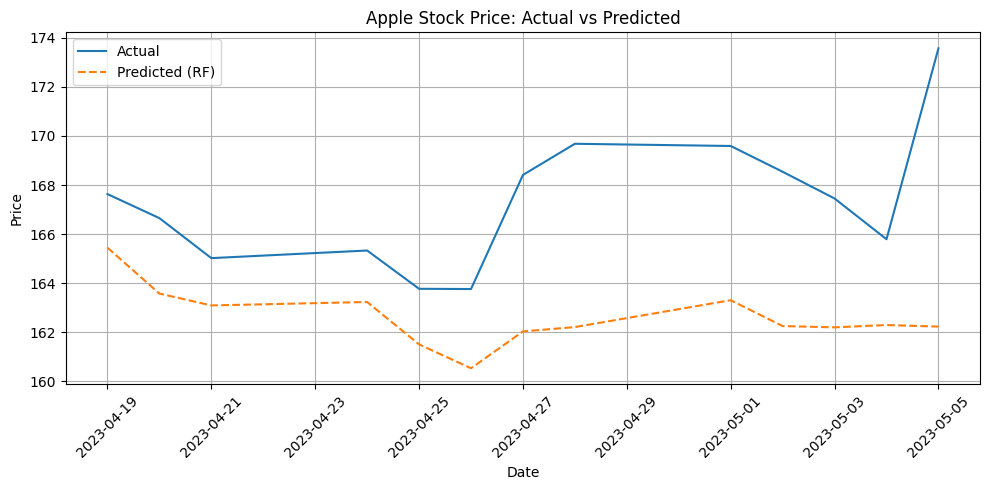

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.plot(data.index[-len(y_test):], y_test, label='Actual')
plt.plot(data.index[-len(y_test):], rf_pred, label='Predicted (RF)', linestyle='--')
plt.title('Apple Stock Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
